## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset=pd.read_csv("heart_failure_clinical_records_dataset.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Taking care of missing values if present

In [3]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Feature Selection

In [10]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05909036, 0.        , 0.03464017, 0.03563755, 0.09083335,
       0.        , 0.        , 0.04845953, 0.02646636, 0.02289659,
       0.05284895, 0.25728895])

In [11]:
mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

11    0.257289
4     0.090833
0     0.059090
10    0.052849
7     0.048460
3     0.035638
2     0.034640
8     0.026466
9     0.022897
1     0.000000
5     0.000000
6     0.000000
dtype: float64

<AxesSubplot:>

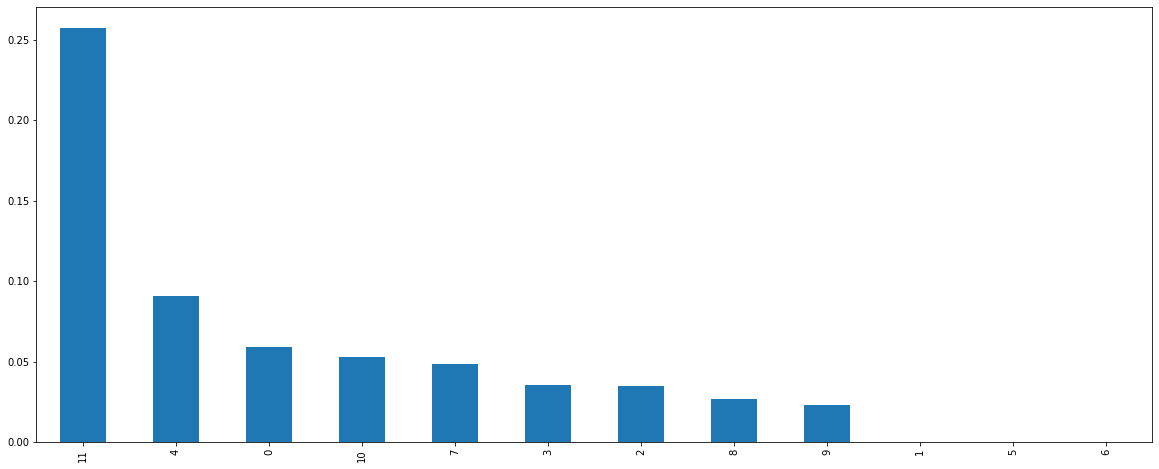

In [12]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [4]:
dataset.drop(["creatinine_phosphokinase","diabetes","platelets","anaemia","serum_sodium","sex","smoking"],axis=1,inplace=True)


## Splitting the dataset into training set and testing set

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model on the training set

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

## Predicting the test set results

In [15]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


## Evaluating the performance of the model

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[35  2]
 [10 13]]


0.8

In [17]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.87      0.57      0.68        23

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.81      0.80      0.79        60



## Hyper Parameter Tunning using GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [25, 50, 75, 100], 'criterion': ['entropy']},
              {'n_estimators': [25, 50, 75, 100], 'criterion': ['gini']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.61 %
Best Parameters: {'criterion': 'entropy', 'n_estimators': 25}
